In [1]:
# Cell 1: Import packages and load CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ROOT
from matplotlib import colors

# Load the data
df = pd.read_csv("/Users/sciencesar/Desktop/coincident_combined_lyso.csv")
print(f"Loaded {len(df)} entries.")
df.head()

Welcome to JupyROOT 6.28/00
Loaded 76966 entries.


,Unnamed: 0,Master_ASIC,Master_CH,Master_TYPE,Master_TIMESTAMP_LSB,Master_PULSE_WIDTH_LSB,Slave_ASIC,Slave_CH,Slave_TYPE,Slave_TIMESTAMP_LSB,Slave_PULSE_WIDTH_LSB,Slave_TOT,Slave_RISETIME,DELAYTIME_LSB
0,0,0,0,3,51126885,860,0,3,3,51125985,44,399,37806,900.0
1,1,0,0,3,333945337,563,0,3,3,333944931,507,4321,86,406.0
2,2,0,0,3,1168028995,601,0,3,3,1168028575,561,4706,80,420.0
3,3,0,0,3,1677495807,765,0,3,3,1677495396,542,5040,78,411.0
4,4,0,0,3,1838248843,141,0,3,3,1838248443,110,2295,176,400.0


In [2]:
# Cell 2: Drop rows with missing data in important columns
df = df.dropna(subset=['DELAYTIME_LSB', 'Slave_RISETIME', 'Slave_TOT'])
print(f"Remaining after dropping NAs: {len(df)} events")
df.head()

Remaining after dropping NAs: 76966 events


,Unnamed: 0,Master_ASIC,Master_CH,Master_TYPE,Master_TIMESTAMP_LSB,Master_PULSE_WIDTH_LSB,Slave_ASIC,Slave_CH,Slave_TYPE,Slave_TIMESTAMP_LSB,Slave_PULSE_WIDTH_LSB,Slave_TOT,Slave_RISETIME,DELAYTIME_LSB
0,0,0,0,3,51126885,860,0,3,3,51125985,44,399,37806,900.0
1,1,0,0,3,333945337,563,0,3,3,333944931,507,4321,86,406.0
2,2,0,0,3,1168028995,601,0,3,3,1168028575,561,4706,80,420.0
3,3,0,0,3,1677495807,765,0,3,3,1677495396,542,5040,78,411.0
4,4,0,0,3,1838248843,141,0,3,3,1838248443,110,2295,176,400.0


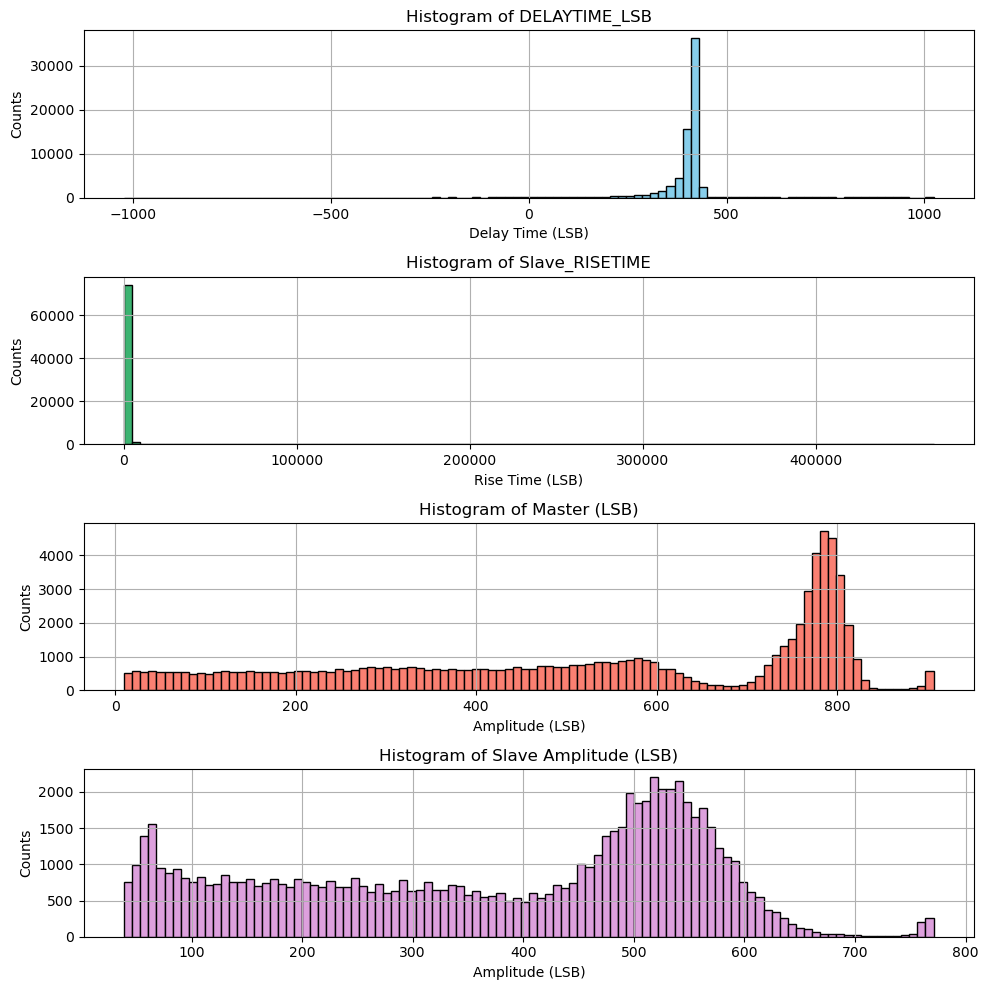

In [3]:
# Cell 3: Plot data

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10), tight_layout=True)

# Plot Delay Time
axs[0].hist(df['DELAYTIME_LSB'], bins = 100, color='skyblue', edgecolor='black')
axs[0].set_title("Histogram of DELAYTIME_LSB")
axs[0].set_xlabel("Delay Time (LSB)")
axs[0].set_ylabel("Counts")
axs[0].grid(True)

# Plot Rise Time
axs[1].hist(df['Slave_RISETIME'], bins = 100, color='mediumseagreen', edgecolor='black')
axs[1].set_title("Histogram of Slave_RISETIME")
axs[1].set_xlabel("Rise Time (LSB)")
axs[1].set_ylabel("Counts")
axs[1].grid(True)

# Plot Amp Ref
axs[2].hist(df['Master_PULSE_WIDTH_LSB'], bins = 100, color='salmon', edgecolor='black')
axs[2].set_title("Histogram of Master (LSB)")
axs[2].set_xlabel("Amplitude (LSB)")
axs[2].set_ylabel("Counts")
axs[2].grid(True)

# Plot Amp Sample
axs[3].hist(df['Slave_PULSE_WIDTH_LSB'], bins = 100, color='plum', edgecolor='black')
axs[3].set_title("Histogram of Slave Amplitude (LSB)")
axs[3].set_xlabel("Amplitude (LSB)")
axs[3].set_ylabel("Counts")
axs[3].grid(True)

plt.show()

In [4]:
# Cell 4: Filter data

df_filtered = df[
    (df['DELAYTIME_LSB'] >= 250) & (df['DELAYTIME_LSB'] <= 500) &
    (df['Slave_RISETIME'] >= 0) & (df['Slave_RISETIME'] <= 200) &
    (df['Master_PULSE_WIDTH_LSB'] >= 740) & (df['Master_PULSE_WIDTH_LSB'] <= 850) &
    (df['Slave_PULSE_WIDTH_LSB'] >= 470) & (df['Slave_PULSE_WIDTH_LSB'] <= 600)
]

print(f"Entries before cuts: {len(df)}")
print(f"Entries after cuts: {len(df_filtered)}")

Entries before cuts: 76966
Entries after cuts: 10168


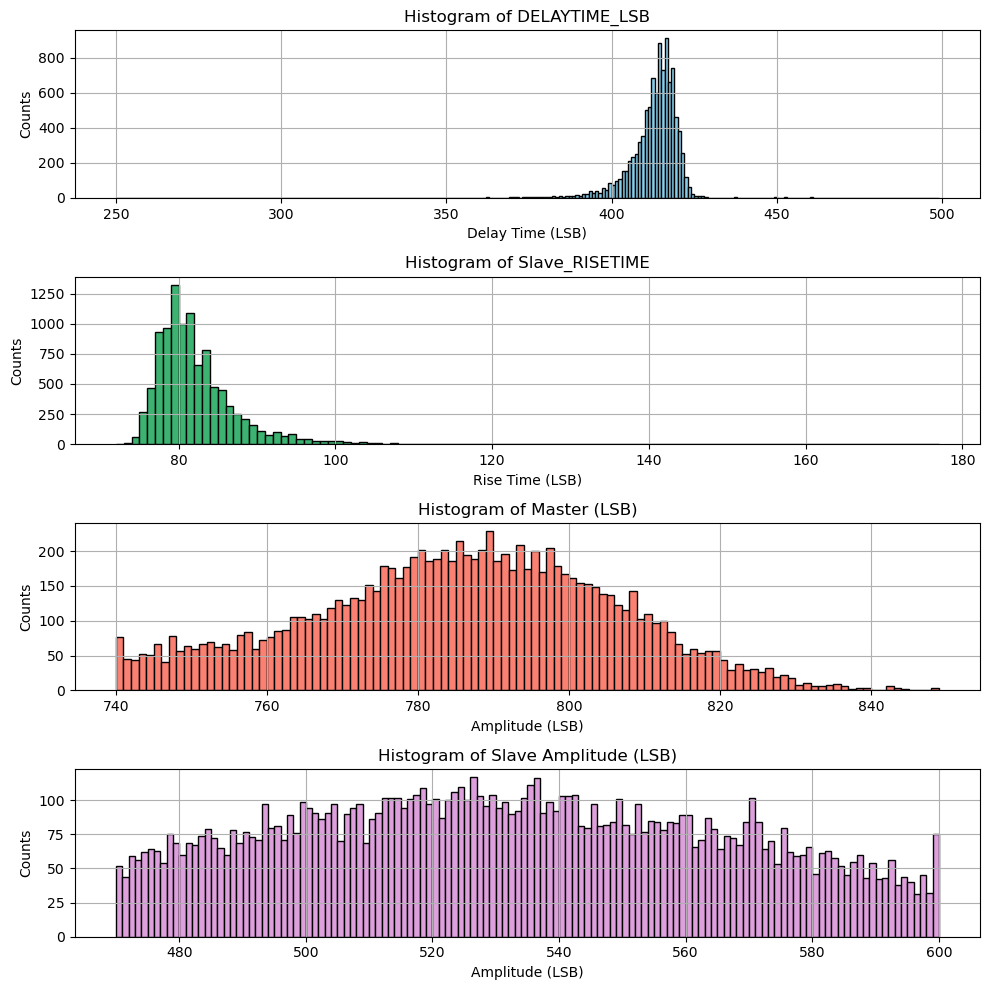

In [ ]:
# Cell 5: Plot Filtered Data

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10), tight_layout=True)

# Plot Delay Time
axs[0].hist(df_filtered['DELAYTIME_LSB'], bins = int(np.max(np.array(df_filtered['DELAYTIME_LSB'])) - np.min(np.array(df_filtered['DELAYTIME_LSB']))), color='skyblue', edgecolor='black')
axs[0].set_title("Histogram of DELAYTIME_LSB")
axs[0].set_xlabel("Delay Time (LSB)")
axs[0].set_ylabel("Counts")
axs[0].grid(True)

# Plot Rise Time
axs[1].hist(df_filtered['Slave_RISETIME'], bins = int(np.max(np.array(df_filtered['Slave_RISETIME'])) - np.min(np.array(df_filtered['Slave_RISETIME']))), color='mediumseagreen', edgecolor='black')
axs[1].set_title("Histogram of Slave_RISETIME")
axs[1].set_xlabel("Rise Time (LSB)")
axs[1].set_ylabel("Counts")
axs[1].grid(True)

# Plot Amp Ref
axs[2].hist(df_filtered['Master_PULSE_WIDTH_LSB'], bins = int(np.max(np.array(df_filtered['Master_PULSE_WIDTH_LSB'])) - np.min(np.array(df_filtered['Master_PULSE_WIDTH_LSB']))), color='salmon', edgecolor='black')
axs[2].set_title("Histogram of Master Amplitude (LSB)")
axs[2].set_xlabel("Amplitude (LSB)")
axs[2].set_ylabel("Counts")
axs[2].grid(True)

# Plot Amp Sample
axs[3].hist(df_filtered['Slave_PULSE_WIDTH_LSB'], bins = int(np.max(np.array(df_filtered['Slave_PULSE_WIDTH_LSB'])) - np.min(np.array(df_filtered['Slave_PULSE_WIDTH_LSB']))), color='plum', edgecolor='black')
axs[3].set_title("Histogram of Slave Amplitude (LSB)")
axs[3].set_xlabel("Amplitude (LSB)")
axs[3].set_ylabel("Counts")
axs[3].grid(True)

plt.show()

In [6]:
# Cell 6: Define Crystal_Ball_Fit()
    ### Input (data), output (FWHM) ###


def Crystal_Ball_Fit(data, bins=100, x_min=None, x_max=None):
    import ROOT
    import numpy as np
    import matplotlib.pyplot as plt

    # Step 1: Histogram the data
    hist_vals, bin_edges = np.histogram(data, bins=bins)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    if x_min is None: x_min = bin_edges[0]
    if x_max is None: x_max = bin_edges[-1]

    # Step 2: Create ROOT histogram
    hist = ROOT.TH1F("hist_cb", "Crystal Ball Fit", bins, x_min, x_max)
    for val in data:
        hist.Fill(val)

    # Step 3: Estimate initial parameters
    approx_mu = np.mean(data)
    approx_amp = max(hist_vals)

    # Step 4: Define & fit Crystal Ball function
    cb_func = ROOT.TF1("cb_func", "[0]*ROOT::Math::crystalball_function(x, [1], [2], [3], [4])", x_min, x_max)
    cb_func.SetParameters(approx_amp, 1.0, 2.0, 10.0, approx_mu)  # amp, alpha, n, sigma, mu
    hist.Fit(cb_func, "RQ")  # "RQ" = quiet fit

    # Step 5: Re-evaluate on fine grid
    x_dense = np.linspace(x_min, x_max, 5000)
    y_dense = [cb_func.Eval(x) for x in x_dense]

    # Step 6: Calculate FWHM
    max_val = max(y_dense)
    half_max = max_val / 2

    left_idx = np.where(np.array(y_dense[:np.argmax(y_dense)]) < half_max)[0]
    right_idx = np.where(np.array(y_dense[np.argmax(y_dense):]) < half_max)[0]

    if len(left_idx) > 0 and len(right_idx) > 0:
        x_left = x_dense[left_idx[-1]]
        x_right = x_dense[np.argmax(y_dense) + right_idx[0]]
        fwhm = x_right - x_left
    else:
        fwhm = -1  # signal an issue

    # Step 7: Plot
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins, color='gray', edgecolor='black', label='Data')
    plt.plot(x_dense, y_dense, 'r-', linewidth=2, label='Crystal Ball Fit')
    plt.xlabel("Delay Time (LSB)")
    plt.ylabel("Counts")
    plt.title("Crystal Ball Fit to Delay Time")
    plt.grid(True)
    plt.legend()
    plt.show()

    return fwhm

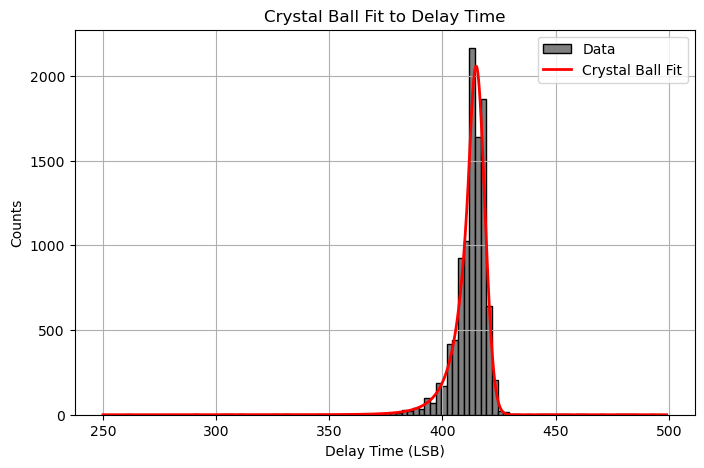

CTR_measured (FWHM): 9.51 LSB
CTR_measured (FWHM): 232.27 ps
CTR_sample: 313.20 ps


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [7]:
# Cell 7: Get CTR

fwhm = Crystal_Ball_Fit(df_filtered['DELAYTIME_LSB'])
print(f"CTR_measured (FWHM): {fwhm:.2f} LSB")

lsb_to_ps = 25000 / 1024  
ctr_measured_ps = fwhm * lsb_to_ps
print(f"CTR_measured (FWHM): {ctr_measured_ps:.2f} ps")

ctr_ref_ps = 99.0  # LYSO known CTR
ctr_sample_ps = np.sqrt(2 * ctr_measured_ps**2 - ctr_ref_ps**2)
print(f"CTR_sample: {ctr_sample_ps:.2f} ps")

In [8]:
# Cell 8: Define Crystal_Ball_Correction()

from matplotlib.colors import LogNorm

def Crystal_Ball_Correction(risetime_data, delay_data, n_chunks=5, bins=100):
    """
    Applies rise time correction to delay times by aligning each chunk's delay peak (mode) to zero.
    Also plots pre- and post-correction RiseTime vs DelayTime heatmaps.
    
    Parameters:
        risetime_data: array-like
        delay_data: array-like
        n_chunks: int – number of chunks to divide by RiseTime
        bins: int – number of bins for histogram mode estimation
    
    Returns:
        df_corrected: pandas DataFrame with RiseTime, original DelayTime, and Corrected_DelayTime
    """
    # Combine and sort by RiseTime
    df = pd.DataFrame({
        'RiseTime': risetime_data,
        'DelayTime': delay_data
    }).sort_values(by='RiseTime').reset_index(drop=True)

    chunk_size = len(df) // n_chunks
    corrected_chunks = []

    # Store for plotting
    df['Corrected_DelayTime'] = np.nan

    for i in range(n_chunks):
        start = i * chunk_size
        end = (i + 1) * chunk_size if i < n_chunks - 1 else len(df)
        chunk = df.iloc[start:end].copy()

        # Estimate peak using histogram mode
        hist_vals, bin_edges = np.histogram(chunk['DelayTime'], bins=bins)
        peak_bin_index = np.argmax(hist_vals)
        peak_center = 0.5 * (bin_edges[peak_bin_index] + bin_edges[peak_bin_index + 1])

        # Shift delay times so peak is centered at 0
        chunk['Corrected_DelayTime'] = chunk['DelayTime'] - peak_center
        corrected_chunks.append(chunk)

    # Combine all corrected data
    df_corrected = pd.concat(corrected_chunks, ignore_index=True)

    # Plot before and after
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].hist2d(df['RiseTime'], df['DelayTime'], bins=bins, cmap='viridis', norm=LogNorm())
    axs[0].set_title("Before Correction")
    axs[0].set_xlabel("Rise Time (LSB)")
    axs[0].set_ylabel("Delay Time (LSB)")
    axs[0].grid(True)

    axs[1].hist2d(df_corrected['RiseTime'], df_corrected['Corrected_DelayTime'],
                  bins=bins, cmap='viridis', norm=LogNorm())
    axs[1].set_title("After Correction")
    axs[1].set_xlabel("Rise Time (LSB)")
    axs[1].set_ylabel("Corrected Delay Time (LSB)")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

    return df_corrected

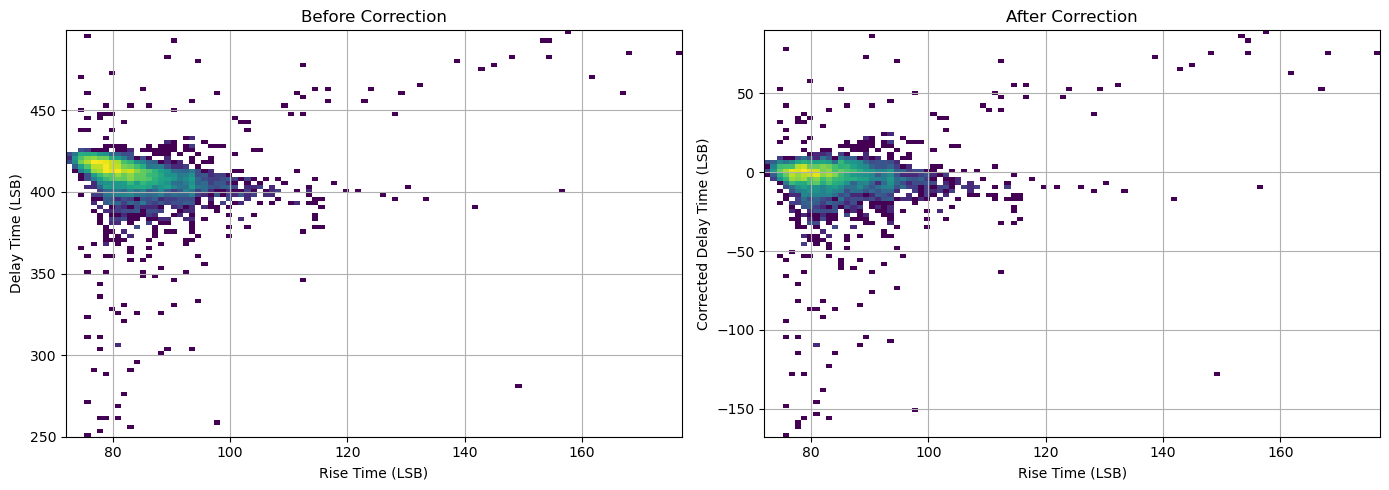

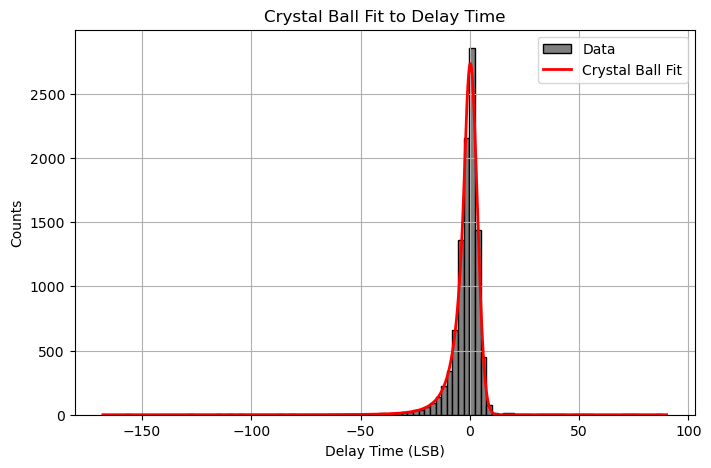

CTR_measured (FWHM): 7.68 LSB
CTR_measured (FWHM): 187.62 ps
CTR_sample: 249.60 ps


In [ ]:
# Cell 9: Get Corrected CTR

df_corr = Crystal_Ball_Correction(risetime_data=df_filtered['Slave_RISETIME'], delay_data=df_filtered['DELAYTIME_LSB'], n_chunks=5)

# Now we can fit:
fwhm_corr = Crystal_Ball_Fit(df_corr['Corrected_DelayTime'])
print(f"CTR_measured (FWHM): {fwhm_corr:.2f} LSB")

lsb_to_ps = 25000 / 1024  
ctr_measured_ps = fwhm_corr * lsb_to_ps
print(f"CTR_measured (FWHM): {ctr_measured_ps:.2f} ps")

ctr_ref_ps = 90.0  # LYSO known CTR
ctr_sample_ps = np.sqrt(2 * ctr_measured_ps**2 - ctr_ref_ps**2)
print(f"CTR_sample: {ctr_sample_ps:.2f} ps")